In [1]:
from Utilities.io import DataLoader
from Utilities.painter import Visualizer
from Models.RRDBNet import RRDBNet# we use RRDB in this demo
from time import time
from tqdm import tqdm
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

### Load in the sample images

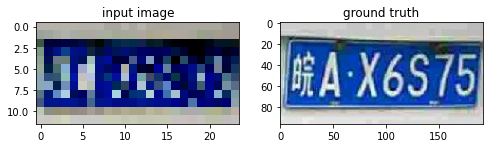

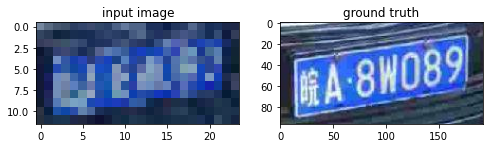

In [2]:
import glob
DATA_PATH = 'Samples'
loader = DataLoader()
data = loader.load(glob.glob(DATA_PATH + '/*.jpg'), batchSize=1)
painter = Visualizer()
for downSample, original in data.take(2):
    painter.plot(downSample, original)

### Load in the pretrained super-resolution model

In [3]:
# pretrained rrdb network can be found in the Pretrained folder
MODEL_PATH = 'Pretrained/rrdb'
model = RRDBNet(blockNum=10)
model.load_weights(MODEL_PATH)

### Run plate enhancement

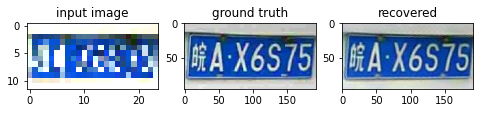

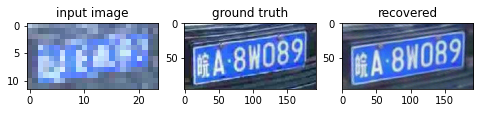

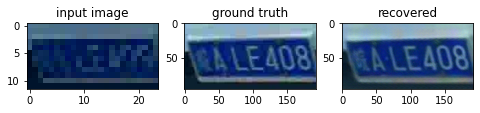

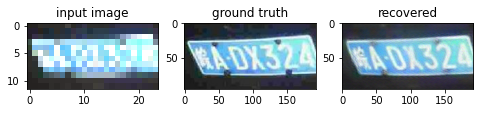

In [4]:
for downSample, original in data.take(4):
    yPred = model.predict(downSample)
    painter.plot(downSample, original, yPred)

In [5]:
num_runs = 100

tic = time()
for _ in tqdm(range(num_runs), total=num_runs):
    yPred = model.predict(downSample)
infer_time = time() - tic
print("Infer time: {:3f} [ms] ~ {:3f} [fps]".format(
    int(1e3*infer_time/num_runs), int(num_runs/infer_time)))

100%|██████████| 100/100 [00:08<00:00, 11.70it/s]

Infer time: 85.000000 [ms] ~ 11.000000 [fps]
